In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [5]:
url = "https://raw.githubusercontent.com/Draco2vault/Python_ML_internship_24/main/student_clustering.csv"
df = pd.read_csv(url)
df.head()


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


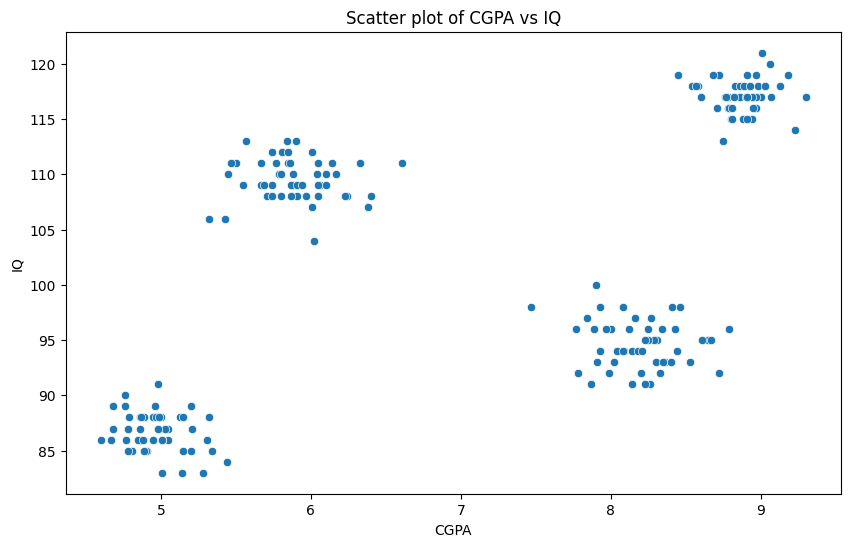

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cgpa', y='iq', data=df)
plt.title('Scatter plot of CGPA vs IQ')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

In [7]:
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(df)
    wcss.append(model.inertia_)

wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[29957.898287999997,
 4184.141269999999,
 2362.7133490000015,
 681.9696600000001,
 514.1616803171117,
 405.1205840691053,
 302.65349935820814,
 242.57898220815957,
 202.82408477012274,
 179.18047513544812]

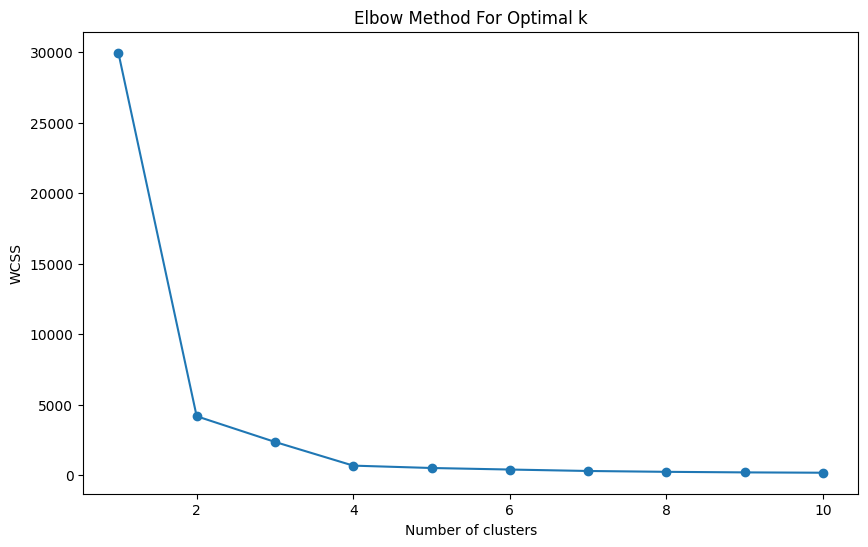

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
x = df.to_numpy()
x

array([[  5.13,  88.  ],
       [  5.9 , 113.  ],
       [  8.36,  93.  ],
       [  8.27,  97.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  8.41,  98.  ],
       [  8.8 , 115.  ],
       [  5.79, 110.  ],
       [  8.09,  94.  ],
       [  4.6 ,  86.  ],
       [  6.1 , 110.  ],
       [  8.16,  97.  ],
       [  5.  ,  88.  ],
       [  5.71, 108.  ],
       [  8.31,  95.  ],
       [  5.5 , 111.  ],
       [  7.87,  91.  ],
       [  6.05, 111.  ],
       [  5.84, 113.  ],
       [  7.47,  98.  ],
       [  4.86,  86.  ],
       [  7.78,  92.  ],
       [  4.78,  87.  ],
       [  4.96,  88.  ],
       [  7.93,  98.  ],
       [  4.86,  87.  ],
       [  9.18, 119.  ],
       [  8.04,  94.  ],
       [  5.43, 106.  ],
       [  8.86, 117.  ],
       [  6.01, 112.  ],
       [  8.83, 118.  ],
       [  5.32, 106.  ],
       [  7.77,  96.  ],
       [  8.  ,  96.  ],
       [  8.56, 118.  ],
       [  5.91, 108.  ],
       [  5.44,  84.  ],
       [  5.57, 113.  ],


In [12]:
model = KMeans(n_clusters=4)
y = model.fit_predict(x)
y


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       2, 0, 0, 2, 0, 3, 2, 1, 3, 1, 3, 1, 2, 2, 3, 1, 0, 1, 0, 2, 2, 0,
       3, 3, 2, 1, 3, 1, 0, 0, 3, 2, 3, 1, 1, 3, 1, 3, 1, 2, 2, 3, 0, 3,
       2, 0, 1, 2, 1, 3, 2, 0, 1, 3, 1, 3, 0, 2, 2, 3, 1, 0, 3, 0, 3, 1,
       3, 1, 3, 3, 2, 0, 2, 2, 3, 2, 0, 3, 1, 0, 0, 3, 0, 0, 2, 0, 3, 3,
       2, 3, 1, 1, 2, 3, 2, 1, 3, 0, 0, 1, 2, 3, 2, 0, 2, 1, 0, 2, 2, 1,
       0, 0, 1, 3, 1, 0, 2, 2, 2, 0, 1, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 3,
       0, 2, 1, 3, 1, 2, 0, 3, 1, 2, 3, 0, 1, 0, 0, 3, 3, 1, 3, 0, 0, 2,
       3, 1, 0, 3, 3, 1, 1, 1, 2, 0, 2, 2, 3, 1, 2, 2, 0, 0, 2, 0, 3, 1,
       1, 3], dtype=int32)

In [13]:
df["Classes"] = y
df

,cgpa,iq,Classes
0,5.13,88,0
1,5.90,113,1
2,8.36,93,2
3,8.27,97,2
4,5.45,110,1
...,...,...,...
195,4.68,89,0
196,8.57,118,3
197,5.85,112,1
198,6.23,108,1


In [15]:
x[y==0,0]


array([5.13, 4.6 , 5.  , 4.86, 4.78, 4.96, 4.86, 5.44, 5.34, 5.31, 5.14,
       4.95, 5.21, 4.91, 5.28, 5.15, 4.9 , 4.89, 5.05, 4.98, 5.01, 4.95,
       4.96, 4.85, 4.76, 4.98, 4.78, 5.2 , 5.05, 5.01, 4.77, 4.68, 4.81,
       5.03, 4.98, 5.32, 4.86, 4.89, 4.88, 5.01, 4.67, 5.15, 4.97, 4.87,
       5.2 , 4.99, 4.79, 4.76, 4.78, 4.68])

In [16]:
x[y==0,1]

array([88., 86., 88., 86., 87., 88., 87., 84., 85., 86., 83., 86., 87.,
       85., 83., 88., 85., 88., 86., 91., 86., 88., 89., 86., 90., 87.,
       87., 85., 87., 83., 86., 87., 85., 87., 87., 88., 88., 85., 86.,
       86., 86., 85., 88., 88., 89., 88., 88., 89., 85., 89.])

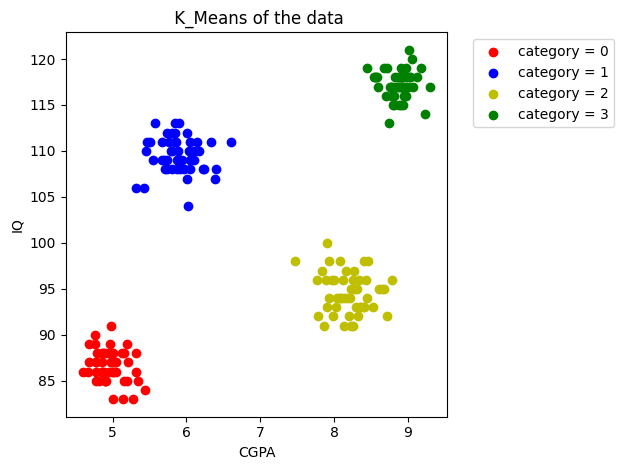

In [17]:
plt.scatter(x[y==0, 0], x[y==0, 1], color='r', label="category = 0")
plt.scatter(x[y==1, 0], x[y==1, 1], color='b', label="category = 1")
plt.scatter(x[y==2, 0], x[y==2, 1], color='y', label="category = 2")
plt.scatter(x[y==3, 0], x[y==3, 1], color='g', label="category = 3")
plt.title(" K_Means of the data")
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
from sklearn.datasets import make_blobs
centroids = [(-5,-5,5),(5,5,-5),(2.5,-2.5,4),(-2.4,2.4,-5)]
cluster_std=[1,1,1,1]
X, y = make_blobs(n_samples=200, centers=centroids, cluster_std=cluster_std)

In [19]:
y

array([2, 1, 3, 2, 0, 1, 2, 3, 1, 2, 3, 2, 2, 1, 1, 2, 2, 1, 0, 2, 3, 2,
       3, 0, 1, 1, 1, 0, 3, 0, 3, 1, 2, 2, 0, 0, 2, 3, 3, 3, 0, 0, 1, 3,
       0, 1, 2, 2, 0, 1, 3, 1, 2, 0, 3, 3, 2, 2, 1, 3, 1, 1, 3, 2, 0, 1,
       1, 0, 3, 0, 3, 1, 3, 1, 2, 3, 1, 1, 3, 2, 2, 0, 2, 0, 2, 3, 2, 0,
       0, 3, 2, 1, 1, 0, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1, 2, 1, 3, 1, 0, 1,
       1, 0, 3, 3, 2, 1, 1, 0, 1, 2, 1, 2, 3, 0, 1, 2, 3, 2, 2, 0, 3, 1,
       2, 3, 3, 3, 2, 0, 2, 0, 1, 1, 1, 2, 3, 2, 2, 0, 2, 3, 0, 1, 0, 3,
       2, 0, 1, 2, 3, 1, 0, 0, 3, 3, 0, 0, 2, 0, 0, 3, 2, 0, 0, 3, 1, 1,
       0, 1, 3, 1, 2, 0, 1, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 2, 2, 3, 0, 3,
       3, 1])

In [20]:
! pip install plotly

In [22]:
import plotly.express as px
from sklearn.datasets import make_blobs
centers = [(-5, -5, 5), (5, 5, -5), (2.5, -2.5, 4), (-2.4, 2.4, -5)]
cluster_std = [1, 1, 1, 1]
X, y = make_blobs(n_samples=200, centers=centers, cluster_std=cluster_std)
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y,
                    labels={'x': 'Feature 1', 'y': 'Feature 2', 'z': 'Feature 3'})
fig.show()
